<a href="https://www.kaggle.com/code/rubanzasilva/ps-s03e05?scriptVersionId=118608036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Dataset description

Goal is to predict the quality of wine
The Score between 0 and 10

imports

In [1]:
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls /kaggle/input/playground-series-s3e5

sample_submission.csv  test.csv  train.csv


Define dataframe

In [3]:
path = Path('/kaggle/input/playground-series-s3e5')
path

Path('/kaggle/input/playground-series-s3e5')

In [4]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample_df = pd.read_csv(path/'sample_submission.csv')

In [5]:
train_df

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42.0,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65.0,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37.0,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13.0,0.99670,3.22,0.42,9.5,5


In [6]:
train_df.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

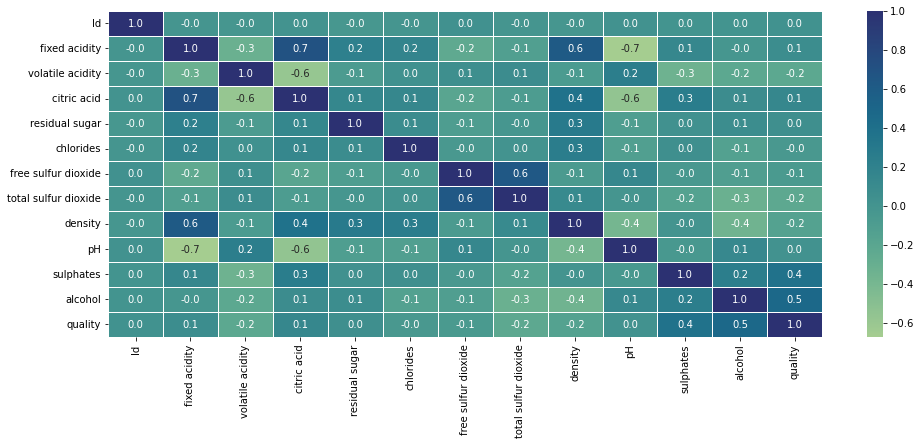

In [7]:
#correlation matrix with heatmap

#set plot size, must be in same cell as train_Corr
plt.figure(figsize=(16,6))
train_corr = sns.heatmap(train_df.corr(), annot=True, fmt=".1f", linewidth=.7, cmap="crest")


**Builing data loaders**

In [8]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="quality",
    cat_names = None,
    cont_names = ['Id', 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    y_block = CategoryBlock,                              
    procs = [Categorify, FillMissing, Normalize])

In [9]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [10]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = None,
    cont_names = ['Id', 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',],
                   y_names='quality',
                   splits=splits)

In [11]:
to.xs.iloc[:2]

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1276,0.415750,0.815476,0.371336,-0.206978,1.172807,5.607896,2.300548,0.480880,0.340017,-0.691956,-0.29980,-1.002880
1237,0.349592,-0.056431,-1.240277,0.746745,0.124957,-0.075624,-0.383636,0.234448,0.893251,-0.974983,-0.22753,-0.133546


In [12]:
dls = to.dataloaders(bs=32)

In [13]:
dls.show_batch()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1841.000022,7.2,0.360,3.200000e-01,2.0,0.082,30.999999,68.000000,0.99694,3.37,0.49,9.2,6.0
1,226.999970,6.8,0.735,-4.963401e-09,1.8,0.052,18.000000,38.000000,0.99467,3.61,0.59,10.9,5.0
2,974.000002,8.1,0.800,-4.963401e-09,1.8,0.078,19.000000,35.000000,0.99690,3.28,0.56,9.6,5.0
3,1912.000030,9.9,0.300,5.700000e-01,1.7,0.087,4.000000,11.000001,0.99788,3.28,0.57,9.5,6.0
4,125.000028,9.3,0.270,5.300000e-01,5.1,0.074,11.000000,38.000000,0.99528,3.20,0.77,11.0,7.0
5,14.000015,6.4,0.660,2.999999e-02,2.2,0.078,30.999999,54.000000,0.99736,3.56,0.57,11.0,6.0
6,85.000023,10.0,0.520,3.300000e-01,2.4,0.076,3.000000,13.999999,0.99780,3.20,0.91,10.1,6.0
7,1526.999984,6.9,0.490,4.500000e-01,5.8,0.050,4.000000,10.000001,0.99560,3.32,0.65,11.0,5.0
8,1859.000024,10.3,0.400,4.900000e-01,2.8,0.093,15.000000,103.999999,0.99940,3.22,0.61,9.2,5.0
9,1705.000006,8.2,0.540,1.200000e-01,1.6,0.066,15.000000,33.000000,0.99760,3.29,0.56,9.7,6.0


In [14]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0063095735386013985)

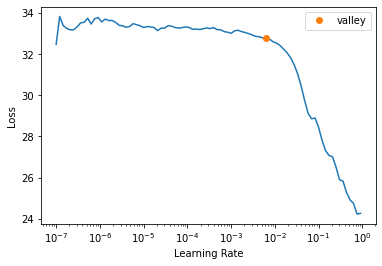

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(20,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,32.897240,31.825972,0.000000,00:00
1,32.482685,31.636175,0.000000,00:00
2,31.187439,29.012907,0.000000,00:00
3,26.819778,20.555376,0.000000,00:00
4,17.725969,7.696347,0.000000,00:00
5,8.563529,2.073647,0.000000,00:00
6,3.666760,0.938399,0.000000,00:00
7,1.698432,0.795823,0.000000,00:00
8,0.983661,0.868867,0.000000,00:00
9,0.699650,0.742662,0.000000,00:00


In [17]:
learn.show_results()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_pred
0,0.263078,-0.521448,0.428893,-0.048024,-0.573611,-0.796668,-0.085394,1.158569,-0.338012,-0.338172,-0.805692,-0.616509,5.0,5.040596
1,-0.055835,-0.753957,-0.549586,-1.425624,-0.340755,-0.711839,0.908749,-0.412437,0.047105,0.935450,-0.588881,-0.616509,4.0,5.861559
2,0.174868,-0.405194,1.464930,-0.895778,-0.224327,0.772663,-0.383636,-0.658870,-0.256637,-1.470282,-1.094772,0.735787,5.0,5.371359
3,-0.602059,0.582967,-0.549586,-0.683839,3.152081,-0.118038,1.604648,1.405002,1.430256,-0.479686,0.928793,1.508528,7.0,6.382119
4,1.118038,-0.928338,0.774239,-1.425624,1.172807,-0.245281,-0.184808,-0.474045,-1.059428,1.784531,-0.877962,3.021813,6.0,6.266157
5,0.990812,-0.986465,0.198663,-1.425624,-0.806466,-0.202867,1.704062,0.172840,-1.059428,2.067558,-0.082990,0.446009,6.0,5.275346
6,-1.485856,-0.347067,2.529745,-1.160701,-0.107899,0.009205,-1.178950,-1.059322,0.567815,0.298638,-1.167043,-0.713102,6.0,5.327266
7,-1.341667,-0.463321,-0.089125,-0.736824,-0.457183,-0.457353,0.312263,1.158569,-0.701436,0.086368,-0.082990,0.735787,5.0,6.275324
8,-0.885349,-0.347067,1.954170,-0.895778,2.453514,0.221276,-0.383636,0.265252,-0.240375,0.227881,-0.372071,-0.906287,5.0,5.312127


In [18]:
dl = learn.dls.test_dl(test_df)

In [19]:
learn.get_preds(dl=dl)

(tensor([[5.1626],
         [5.6168],
         [5.2592],
         ...,
         [5.2103],
         [5.4005],
         [6.3999]]),
 None)

In [20]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[5.1626],
         [5.6168],
         [5.2592],
         ...,
         [5.2103],
         [5.4005],
         [6.3999]]),
 None)

Submit to kaggle

In [21]:
target_preds = preds[0]

In [22]:
test_df['quality'] = target_preds

test_df.to_csv('submission.csv', columns=['Id','quality'], index=False)

submission = pd.read_csv('submission.csv')
submission.head()

,Id,quality
0,2056,5.162600
1,2057,5.616783
2,2058,5.259195
3,2059,5.945306
4,2060,6.137289


In [23]:
!ls

__notebook__.ipynb  models  submission.csv
